In [1]:
import xarray as xr
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from pyresample import image, geometry
import metpy
from extractROIfiles import normIm, cartopy_pyresample_toggle_extent,  trasform_cartopy_extent
%matplotlib inline

In [31]:
datapath = Path('/','mnt','g','GOESProj','data','fall_data')
datapath = Path('/','mnt','g','GOESProj','data','fall_data')
xpath = Path('/','mnt','g','GOESProj','data','roi_fall_data')
fname = Path('OR_ABI-L1b-RadF-M6C08_G16_s2019241_xr.nc')
fname2 = Path('OR_ABI-L1b-RadF-M6C08_G17_s2019103_xr.nc')
fname3 = Path('OR_ABI-L1b-RadOR_ABI-L1b-RadF-M6C07_G16_s2019103_xr.nc')

In [9]:
pc = ccrs.PlateCarree()
mc = ccrs.Mercator()

# Convert extent from pc to mc (both cylindrical projections)
extent_pc = [-109.59326, -102.40674, 8.94659, -8.94656]
target_extent_mc_cartopy = trasform_cartopy_extent(extent_pc, pc, mc)
target_extent_mc_pyresample = cartopy_pyresample_toggle_extent(target_extent_mc_cartopy)
print('target_extent_mc_pyresample',target_extent_mc_pyresample)
print('target_extent_mc_cartopy',target_extent_mc_cartopy)

target_extent_mc_pyresample [-12199865.89757484    993361.38872422 -11399866.15059916
   -993358.03009699]
target_extent_mc_cartopy [-12199865.89757484 -11399866.15059916    993361.38872422
   -993358.03009699]


In [32]:
new_xr = xr.load_dataset(fname3)

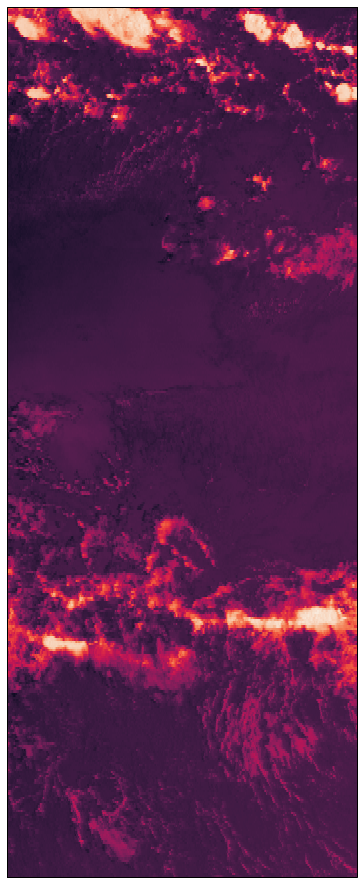

In [34]:
fig = plt.figure(figsize=(30,16))
ax = fig.add_subplot(1,1,1, projection=mc)
ax.set_extent(target_extent_mc_cartopy, crs=mc)
plt.imshow(normIm(new_xr.Rad.data[:,:,0],gamma=1.0,reverse=True),
               origin='upper',
               extent=target_extent_mc_cartopy,
               transform=mc,
               interpolation='none')

In [15]:
fullimFilename = !(ls /mnt/g/GOESProj/data/fall_data | grep -i M6C07_G16 | grep -i s2019240000)
fullimFilename = fullimFilename[0]
print(fullimFilename)

OR_ABI-L1b-RadF-M6C07_G16_s20192400000200_e20192400009519_c20192400009577.nc


In [83]:
full_xr = xr.load_dataset(datapath/Path(fullimFilename))
dat = full_xr.metpy.parse_cf('Rad')
dqf = full_xr.metpy.parse_cf('DQF')

In [19]:
geos_crs= dat.metpy.cartopy_crs

In [20]:
rad = dat.data

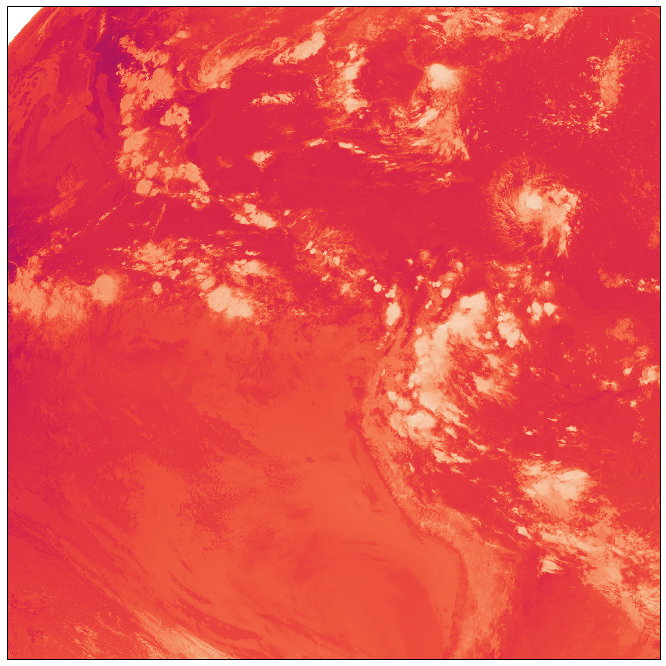

In [28]:
fig  = plt.figure(figsize=(12, 12))
imdata = normIm(rad[800:-1200,600:-1400], gamma=1/3.0, reverse=True)
ax = fig.add_subplot(1,1,1, projection=geos_crs)
ax.imshow(imdata,origin='upper')

In [40]:
full_xr

<xarray.Dataset>
Dimensions:                                           (band: 1, num_star_looks: 24, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 5424, y: 5424)
Coordinates:
    t                                                 datetime64[ns] 2019-08-28T00:05:05.996156032
  * y                                                 (y) float32 0.151844 ... -0.151844
  * x                                                 (x) float32 -0.151844 ... 0.151844
    y_image                                           float32 0.0
    x_image                                           float32 0.0
    band_id                                           (band) int8 7
    band_wavelength                                   (band) float32 3.89
    t_star_look                                       (num_star_looks) datetime64[ns] 2000-01-01T11:43:21 ... 2000-01-01T11:43:21
    band_wavelength_star_look                         (num_star_looks) float32 -999.0 ... -999.0
Dimensions without coordinates: band, num_star_looks, number_of_image_bounds, number_of_time_bounds
Data variables:
    Rad                                               (y, x) float32 nan ... nan
    DQF                                               (y, x) float32 nan ... nan
    time_bounds                                       (number_of_time_bounds) datetime64[ns] 2019-08-28T00:00:20.023921024 2019-08-28T00:09:51.968392064
    goes_imager_projection                            int32 -2147483647
    y_image_bounds                                    (number_of_image_bounds) float32 0.151872 -0.151872
    x_image_bounds                                    (number_of_image_bounds) float32 -0.151872 0.151872
    nominal_satellite_subpoint_lat                    float64 0.0
    nominal_satellite_subpoint_lon                    float64 -75.2
    nominal_satellite_height                          float64 3.579e+04
    geospatial_lat_lon_extent                         float32 9.96921e+36
    yaw_flip_flag                                     float64 0.0
    esun                                              float64 nan
    kappa0                                            float64 nan
    planck_fk1                                        float64 2.023e+05
    planck_fk2                                        float64 3.698e+03
    planck_bc1                                        float64 0.4336
    planck_bc2                                        float64 0.9994
    valid_pixel_count                                 float64 2.305e+07
    missing_pixel_count                               float64 92.0
    saturated_pixel_count                             float64 0.0
    undersaturated_pixel_count                        float64 0.0
    focal_plane_temperature_threshold_exceeded_count  float64 0.0
    min_radiance_value_of_valid_pixels                float64 -0.0007142
    max_radiance_value_of_valid_pixels                float64 9.71
    mean_radiance_value_of_valid_pixels               float64 0.524
    std_dev_radiance_value_of_valid_pixels            float64 0.2835
    maximum_focal_plane_temperature                   float64 59.88
    focal_plane_temperature_threshold_increasing      float64 81.0
    focal_plane_temperature_threshold_decreasing      float64 81.0
    percent_uncorrectable_L0_errors                   float64 0.0
    earth_sun_distance_anomaly_in_AU                  float64 1.01
    algorithm_dynamic_input_data_container            int32 -2147483647
    processing_parm_version_container                 int32 -2147483647
    algorithm_product_version_container               int32 -2147483647
    star_id                                           (num_star_looks) float32 nan ... nan
Attributes:
    naming_authority:          gov.nesdis.noaa
    Conventions:               CF-1.7
    standard_name_vocabulary:  CF Standard Name Table (v35, 20 July 2016)
    institution:               DOC/NOAA/NESDIS > U.S. Department of Commerce,...
    project:                   GOES
    production_sit

In [31]:
new_xr2 = xr.load_dataarray(xpath/fname2)

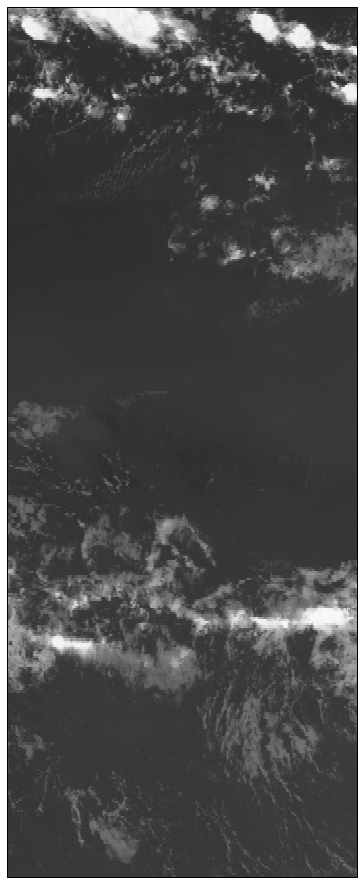

In [39]:
fig = plt.figure(figsize=(30,16))
ax = fig.add_subplot(1,1,1, projection=mc)
ax.set_extent(target_extent_mc_cartopy, crs=mc)
plt.imshow(normIm(new_xr2.data[:,:,0],gamma=0.8,reverse=True),
               vmin=-0.2,
               origin='upper',
               extent=target_extent_mc_cartopy,
               transform=mc,
               interpolation='none', cmap='gray')

In [129]:
fname3 = Path('OR_ABI-L1b-RadF-M6C10_G17_s2019103_xr.nc')
new_xr3 = xr.load_dataset(xpath/fname3)

In [130]:
print(new_xr3)

<xarray.Dataset>
Dimensions:     (time: 144, x: 401, y: 2001)
Coordinates:
    lon         (x, y) float64 -8.924 -8.924 -8.924 -8.924 ... 8.924 8.924 8.924
    lat         (x, y) float64 -109.6 -109.6 -109.6 ... -102.4 -102.4 -102.4
  * time        (time) datetime64[ns] 2019-04-13T00:05:07.813433088 ... 2019-04-13T23:55:07.812508032
Dimensions without coordinates: x, y
Data variables:
    Rad         (x, y, time) float32 18.503983 18.584146 ... 13.91453 14.475685
    DQF         (x, y, time) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    planck_fk1  (time) float64 3.016e+04 3.016e+04 ... 3.016e+04 3.016e+04
    planck_fk2  (time) float64 1.961e+03 1.961e+03 ... 1.961e+03 1.961e+03
    planck_bc1  (time) float64 0.05653 0.05653 0.05653 ... 0.05653 0.05653
    planck_bc2  (time) float64 0.9999 0.9999 0.9999 ... 0.9999 0.9999 0.9999
Attributes:
    platform:    17
    abiproduct:  OR_ABI-L1b-RadF
    band:        10


In [131]:
rad3 = new_xr3.Rad.data

In [132]:
nancount=np.isnan(rad3nan).reshape((rad3.shape[0]*rad3.shape[1],rad3.shape[2])).sum(axis=0)
nancount.shape

(144,)

In [133]:
nancount.max()

802401

In [134]:
df =pd.DataFrame({'NaN Fraction':nancount/(rad3.shape[0]*rad3.shape[1]) ,'time':times3})


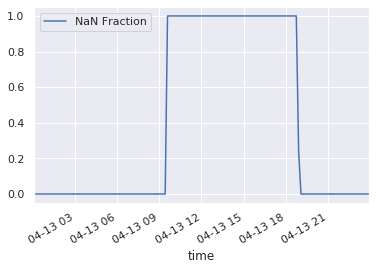

In [135]:
df.plot(x='time', y='NaN Fraction')

In [91]:
new_xr3['planck_fk1'].data

array([30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
       30160., 30160., 30160., 30160., 30160., 30160., 30160., 30160.,
      

In [127]:
rad3 = new_xr3['Rad'].data
rad3.shape

(401, 2001, 144)

In [128]:
np.isnan(rad3.ravel()).sum()

45125242

In [97]:
dqf3 = new_xr3['DQF'].data
dqf3.shape

(401, 2001, 144)

In [99]:
uniq = list(set(dqf3.ravel().tolist()))
uniq

[0.0, 4.0]

In [106]:
dqf3_0=dqf3[:,:,0]
print(dqf3_0.shape)
print(dqf3_0.min(),dqf3_0.max())

(401, 2001)
0.0 0.0


In [107]:
dqf3_0=dqf3[:,:,65]
print(dqf3_0.shape)
print(dqf3_0.min(),dqf3_0.max())

(401, 2001)
4.0 4.0


In [93]:
times3 = new_xr3.time.data
times3.shape

(144,)

In [109]:
rad3nan = rad3[:]
rad3nan.shape

(401, 2001, 144)

In [110]:
rad3nan[dqf3==4.0]=np.nan

In [115]:
nancount=np.isnan(rad3nan).reshape((rad3.shape[0]*rad3.shape[1],rad3.shape[2])).sum(axis=0)
nancount.shape

(144,)

In [117]:
means17 = np.nanmean(rad3nan.reshape((rad3.shape[0]*rad3.shape[1],rad3.shape[2])),axis=0)
means17.shape

<ipython-input-117-c745f6557023>:1: RuntimeWarning: Mean of empty slice
  means17 = np.nanmean(rad3nan.reshape((rad3.shape[0]*rad3.shape[1],rad3.shape[2])),axis=0)


(144,)

In [58]:
import pandas as pd


In [122]:
df =pd.DataFrame({'Mean Radiance':means17, 'NaN Fraction':nancount/(rad3.shape[0]*rad3.shape[1]) ,'time':times3})

In [123]:
df.describe()

,Mean Radiance,NaN Fraction
count,88.000000,144.000000
mean,16.145340,0.390540
std,0.582171,0.488278
min,15.300690,0.000000
25%,15.499130,0.000000
50%,16.263035,0.000000
75%,16.668005,1.000000
max,16.933210,1.000000


In [73]:
df['time']

0     2019-04-13 00:05:07.813433088
1     2019-04-13 00:15:07.821904000
2     2019-04-13 00:25:07.896754944
3     2019-04-13 00:35:07.832660992
4     2019-04-13 00:45:07.812923008
                   ...             
139   2019-04-13 23:15:07.820477952
140   2019-04-13 23:25:07.805714048
141   2019-04-13 23:35:07.821748992
142   2019-04-13 23:45:07.811593984
143   2019-04-13 23:55:07.812508032
Name: time, Length: 144, dtype: datetime64[ns]

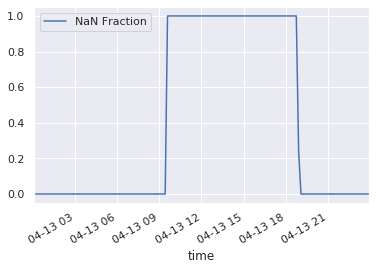

In [124]:
df.plot(x='time', y='NaN Fraction')

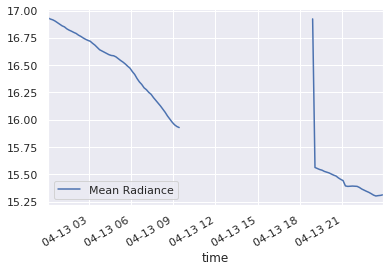

In [125]:
df.plot(x='time', y='Mean Radiance')

In [146]:
df['time'][0]

Timestamp('2019-04-13 00:05:07.813433088')

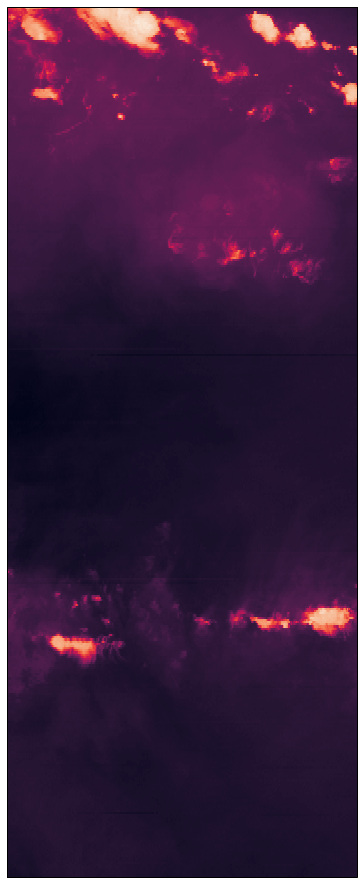

In [78]:
fig = plt.figure(figsize=(30,16))
ax = fig.add_subplot(1,1,1, projection=mc)
ax.set_extent(target_extent_mc_cartopy, crs=mc)
plt.imshow(normIm(,gamma=1.0,reverse=True),
               origin='upper',
               extent=target_extent_mc_cartopy,
               transform=mc,
               interpolation='none')

In [145]:
new_xr3.DQF.data[:,:,0].max()

0.0

In [144]:
new_xr3.DQF.data[:,:,0].min()

0.0

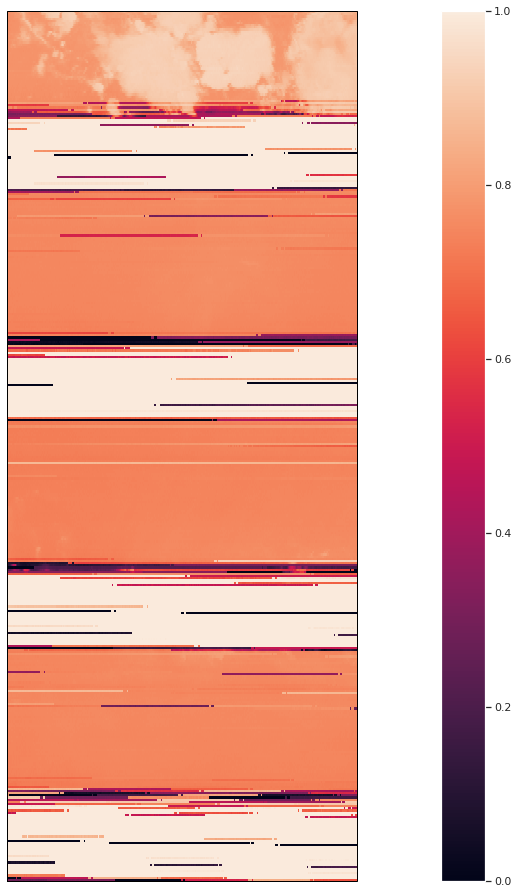

In [165]:
fig = plt.figure(figsize=(30,16))
ax = fig.add_subplot(1,1,1, projection=mc)
ax.set_extent(target_extent_mc_cartopy, crs=mc)
im = ax.imshow(normIm(new_xr3.Rad.data[:,:,65],gamma=1.0,reverse=True),
               origin='upper',
               extent=target_extent_mc_cartopy,
               transform=mc,
               interpolation='none')
fig.colorbar(im, ax=ax)

In [ ]:
foo = new_xr3.Rad.data[:,:,65]

In [151]:
new_xr3.DQF.data[:,:,65].min()

4.0

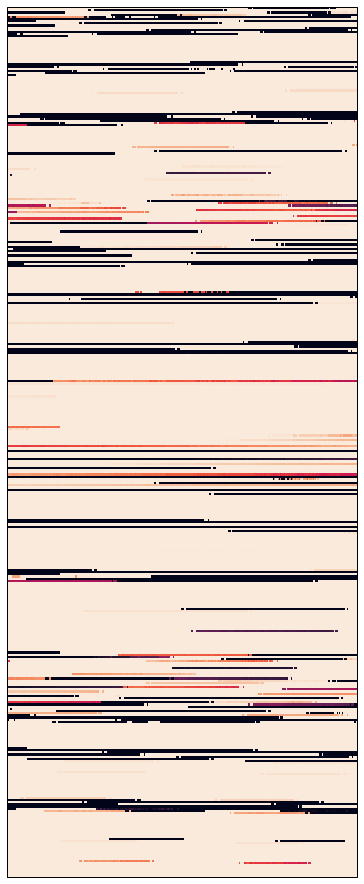

In [136]:
fig = plt.figure(figsize=(30,16))
ax = fig.add_subplot(1,1,1, projection=mc)
ax.set_extent(target_extent_mc_cartopy, crs=mc)
plt.imshow(normIm(new_xr3.Rad.data[:,:,90],gamma=1.0,reverse=True),
               origin='upper',
               extent=target_extent_mc_cartopy,
               transform=mc,
               interpolation='none')

In [137]:
nanim = new_xr3.Rad.data[:,:,90]==np.nan

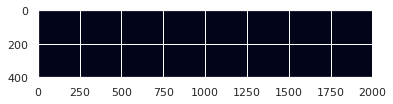

In [138]:
plt.imshow(nanim)

In [141]:
dqf3 = new_xr3.DQF.data[:,:,90]

In [142]:
dqf3.max()

4.0

In [143]:
dqf3.min()

4.0

In [140]:
nanim.sum()

0

In [88]:
df['time'][65]

Timestamp('2019-04-13 10:55:08.018273920')

In [4]:
from extractROIfiles import getMatchesFromFiles


In [5]:
getMatchesFromFiles(filenames,band=None, platform=None, year=None, dayofyear=None, hour=None, minute=None, second=None)

NameError: name 'filenames' is not defined

In [6]:
from extractROIfiles import getMatchesFromFiles
from pathlib import Path
#getMatchesFromFiles(dirlist, band=band, platform=platform, year=year, dayofyear=dayofyear)

In [7]:
datapath = Path('./data')
dirlist = list(str(item) for item in datapath.glob('*'))
print(dirlist)

['data/OR_ABI-L1b-RadF-M6C07_G16_s20191030000200_e20191030009519_c20191030009557.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20191030010200_e20191030019520_c20191030019552.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192001200409_e20192001210128_c20192001210168.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192001200409_e20192001210128_c20192001210168.png', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192400000200_e20192400009519_c20192400009577.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192400010200_e20192400019519_c20192400019578.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192400020200_e20192400029519_c20192400029586.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192400030200_e20192400039519_c20192400039582.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192400040200_e20192400049519_c20192400049583.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192400050200_e20192400059519_c20192400059587.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192400100200_e20192400109519_c20192400109580.nc', 'data/OR_ABI-L1b-RadF-M6C07_G16_s20192400110200_e20192400119520

In [9]:
getMatchesFromFiles(dirlist, band=None, platform=16, year=2019, dayofyear=102, product="OR_ABI-L1b-Rad")

[]

In [2]:
fnameACM = Path('data/OR_ABI-L2-ACMF-M6_G17_s20191030030339_e20191030039405_c20191030039593.nc')

In [3]:
fnameACM.exists()

True

In [4]:
acm_xr = xr.load_dataset(fnameACM)

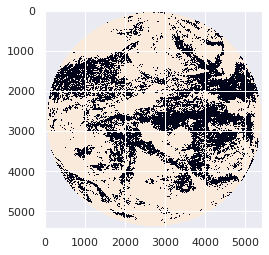

In [5]:
plt.imshow(acm_xr['BCM'])

In [6]:
datas = acm_xr.metpy.parse_cf()
datas

<xarray.Dataset>
Dimensions:                                                     (RTM_BT_comparison_bands: 2, number_of_LZA_bounds: 2, number_of_SZA_bounds: 2, number_of_image_bounds: 2, number_of_time_bounds: 2, x: 5424, y: 5424)
Coordinates:
    t                                                           datetime64[ns] 2019-04-13T00:35:07.261564032
  * y                                                           (y) float32 5433893.0 ... -5433893.0
  * x                                                           (x) float32 -5433893.0 ... 5433893.0
    y_image                                                     float64 0.0
    x_image                                                     float64 0.0
    retrieval_local_zenith_angle                                float32 90.0
    quantitative_local_zenith_angle                             float32 70.0
    retrieval_solar_zenith_angle                                float32 180.0
    twilight_solar_zenith_angle                                 float32 90.0
    crs                                                         object Projection: geostationary
    RTM_BT_comparison_wavelengths                               (RTM_BT_comparison_bands) float32 11.2 12.3
    RTM_BT_comparison_band_ids                                  (RTM_BT_comparison_bands) int8 14 15
Dimensions without coordinates: RTM_BT_comparison_bands, number_of_LZA_bounds, number_of_SZA_bounds, number_of_image_bounds, number_of_time_bounds
Data variables:
    BCM                                                         (y, x) float32 nan ... nan
    DQF                                                         (y, x) float32 nan ... nan
    time_bounds                                                 (number_of_time_bounds) datetime64[ns] 2019-04-13T00:30:33.927153920 2019-04-13T00:39:40.595972992
    goes_imager_projection                                      int32 -2147483647
    y_image_bounds                                              (number_of_image_bounds) float32 0.151872 -0.151872
    x_image_bounds                                              (number_of_image_bounds) float32 -0.151872 0.151872
    nominal_satellite_subpoint_lat                              float64 0.0
    nominal_satellite_subpoint_lon                              float64 -137.2
    nominal_satellite_height                                    float64 3.579e+04
    geospatial_lat_lon_extent                                   float32 9.96921e+36
    total_number_of_cloud_mask_points                           float64 2.032e+07
    number_of_clear_pixels                                      float64 5.261e+06
    number_of_probably_clear_pixels                             float64 1.856e+06
    number_of_probably_cloudy_pixels                            float64 1.903e+06
    number_of_cloudy_pixels                                     float64 1.13e+07
    percent_clear_pixels                                        float64 0.2283
    percent_probably_clear_pixels                               float64 0.08051
    percent_probably_cloudy_pixels                              float64 0.08256
    percent_cloudy_pixels                                       float64 0.4903
    percent_terminator_pixels                                   float64 0.0491
    min_obs_modeled_diff_RTM_BT_comparison_bands_all_sky        (RTM_BT_comparison_bands) float32 -102.09451 -98.06601
    max_obs_modeled_diff_RTM_BT_comparison_bands_all_sky        (RTM_BT_comparison_bands) float32 22.571411 20.605042
    mean_obs_modeled_diff_RTM_BT_comparison_bands_all_sky       (RTM_BT_comparison_bands) float32 -12.563007 -11.81618
    std_dev_obs_modeled_diff_RTM_BT_comparison_bands_all_sky    (RTM_BT_comparison_bands) float32 18.134933 17.509518
    min_obs_modeled_diff_RTM_BT_comparison_bands_clear_sky      (RTM_BT_comparison_bands) float32 -18.024323 -17.525208
    max_obs_modeled_diff_RTM_BT_comparison_bands_clear_sky      (RTM_BT_comparison_bands) float32 22.571411 20.605042
    mean_obs_mode

In [7]:
bcm = acm_xr.metpy.parse_cf('BCM')